<a href="https://colab.research.google.com/github/knightcomrade/AAAA/blob/main/CAS_10_201A_AMAR_FINAL_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels

import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**EXPLANATION ON USING HOLT-WINTER'S MODEL**

According to SolarWinds (2019), Holt-Winter's model is a way to forecast several data using timeseries related data. Now, in order to compensate with the time frame given before the deadline of the finals exam, the student opted to use Holt-Winter instead of the expected ARIMA since H-W is faster to understand. Thank you for understanding.

*   SolarWinds (2019, December 19) *Holt-Winters Forecasting and Exponential Smoothing Simplified*. https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/


NOTE: I would've used ARIMA prediction entirelt with Holt-Winter but for some reason the model.fit function won't work properly and I ran out of time figuring out the reason why its not working. Although I could've used SKLearn, I don't have the mental capacity to debug the source code I found to fit with the data given. Also it would be completely hypocritical of me to just copy and paste codes I found without actually understanding what I'm reading.


# CODES DERIVED FROM

*   https://www.kaggle.com/code/jihyeseo/visualize-sunspot-count-count-past-hundred-years/notebook
*   https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
*   https://github.com/krishnasrujan/predicting-sunspots-using-arima/blob/master/predicting-sunspots-using-arima.ipynb
*   https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
*   https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
*   https://github.com/brewersey/sunspots/blob/master/LSTM-Sunpots-tn_b.ipynb



# DAILY

In [281]:
sunspots = pd.read_csv('SIDC-SUNSPOTS_D.csv')
sunspots['Daily Sunspot Number'] = sunspots['Daily Sunspot Number'].fillna(0)
sunspots['Date'] = pd.to_datetime(sunspots['Date'])
sunspots

,Date,Daily Sunspot Number,Standard Deviation,Number of Observations,Definitive/Provisional Indicator
0,2017-07-31,0.0,0.0,40.0,0.0
1,2017-07-30,15.0,5.0,33.0,0.0
2,2017-07-29,16.0,7.7,11.0,0.0
3,2017-07-28,11.0,1.5,17.0,0.0
4,2017-07-27,0.0,0.0,33.0,0.0
...,...,...,...,...,...
69644,1818-01-19,105.0,13.0,1.0,1.0
69645,1818-01-18,98.0,12.6,1.0,1.0
69646,1818-01-17,77.0,11.1,1.0,1.0
69647,1818-01-13,37.0,7.7,1.0,1.0


In [282]:
daily = sunspots.loc[(sunspots['Date'] >= '1749') & (sunspots['Date'] <= '2018')]
daily = daily[daily.columns[~daily.columns.isin(['Number of Observations','Definitive/Provisional Indicator','Standard Deviation'])]]
daily

,Date,Daily Sunspot Number
0,2017-07-31,0.0
1,2017-07-30,15.0
2,2017-07-29,16.0
3,2017-07-28,11.0
4,2017-07-27,0.0
...,...,...
69644,1818-01-19,105.0
69645,1818-01-18,98.0
69646,1818-01-17,77.0
69647,1818-01-13,37.0


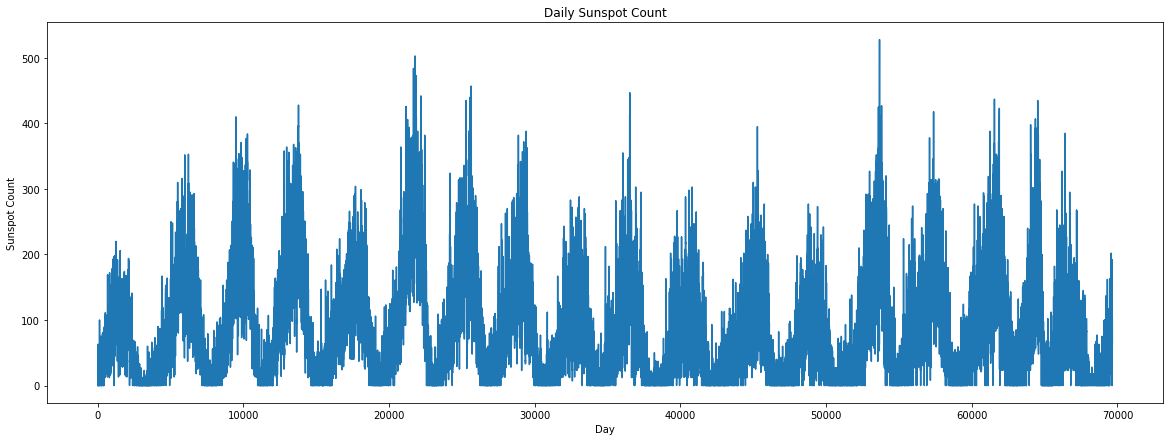

In [283]:
Y = daily['Daily Sunspot Number']
X = [x for x in range(0, len(Y))]

fig, ax = plt.subplots(1,1, figsize=(20,7))
plt.title("Daily Sunspot Count")
plt.xlabel("Day")
plt.ylabel("Sunspot Count")
plt.plot(X, Y)

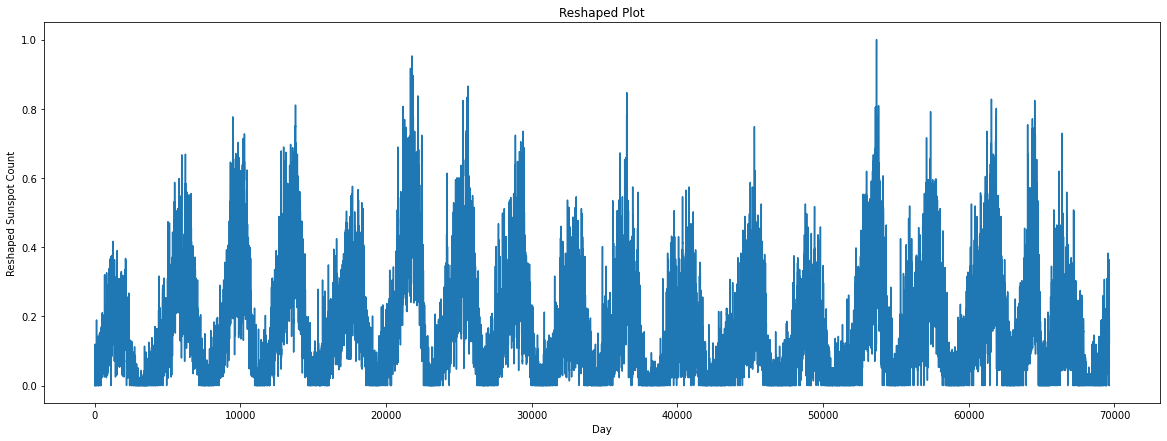

In [284]:
np.random.seed()
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y.values.reshape(-1,1))
fig, ax = plt.subplots(1,1, figsize=(20,7))
plt.title("Reshaped Plot")
plt.xlabel("Day")
plt.ylabel("Reshaped Sunspot Count")
plt.plot(X, Y1)

In [285]:
count = int(daily.shape[0]*0.8)
Train = daily[:count]
Test = daily[count:]

y_hat_avg = Test.copy()
fit1 = Holt(np.asarray(Train['Daily Sunspot Number'])).fit()

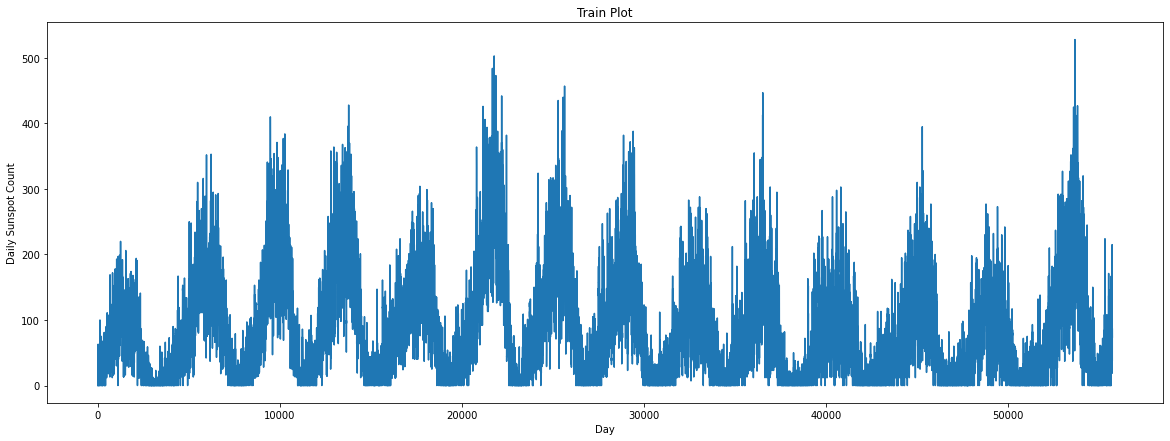

In [286]:
plt.figure(figsize=(20,7))
plt.title("Train Plot")
plt.xlabel("Day")
plt.ylabel("Daily Sunspot Count")
plt.plot(Train.index, Train['Daily Sunspot Number'])

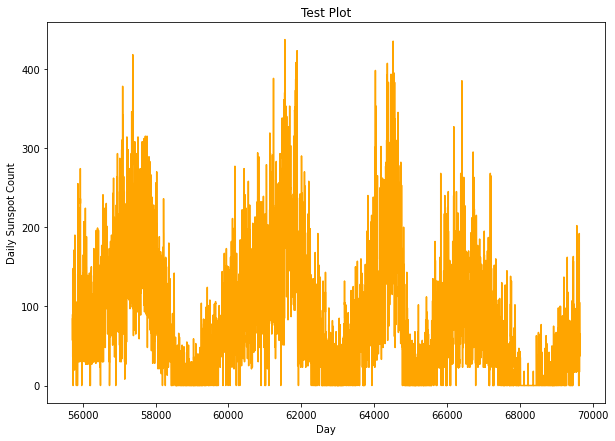

In [287]:
plt.figure(figsize=(10,7))
plt.title("Test Plot")
plt.xlabel("Day")
plt.ylabel("Daily Sunspot Count")
plt.plot(Test.index,Test['Daily Sunspot Number'], color='orange')

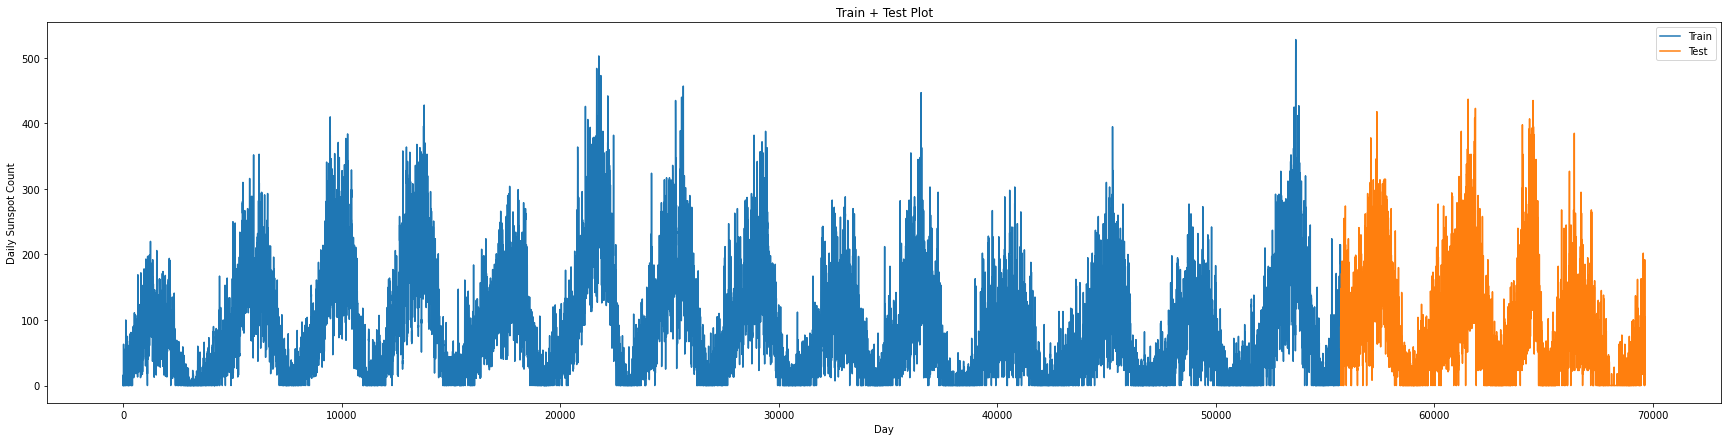

In [288]:
plt.figure(figsize=(30,7))
plt.title("Train + Test Plot")
plt.xlabel("Day")
plt.ylabel("Daily Sunspot Count")
plt.plot(Train.index, Train['Daily Sunspot Number'], label='Train')
plt.plot(Test.index,Test['Daily Sunspot Number'], label='Test')
plt.legend(loc='best')

In [289]:
Predict_Daily = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': Y, 
                                             'Train_Prediction': Train['Daily Sunspot Number'], 
                                             'Test_Prediction':Test['Daily Sunspot Number']},
                                    index = Y.index,)
Predict_Daily

,Time_step,Observed,Train_Prediction,Test_Prediction
0,0,0.0,0.0,NaN
1,1,15.0,15.0,NaN
2,2,16.0,16.0,NaN
3,3,11.0,11.0,NaN
4,4,0.0,0.0,NaN
...,...,...,...,...
69644,69644,105.0,NaN,105.0
69645,69645,98.0,NaN,98.0
69646,69646,77.0,NaN,77.0
69647,69647,37.0,NaN,37.0


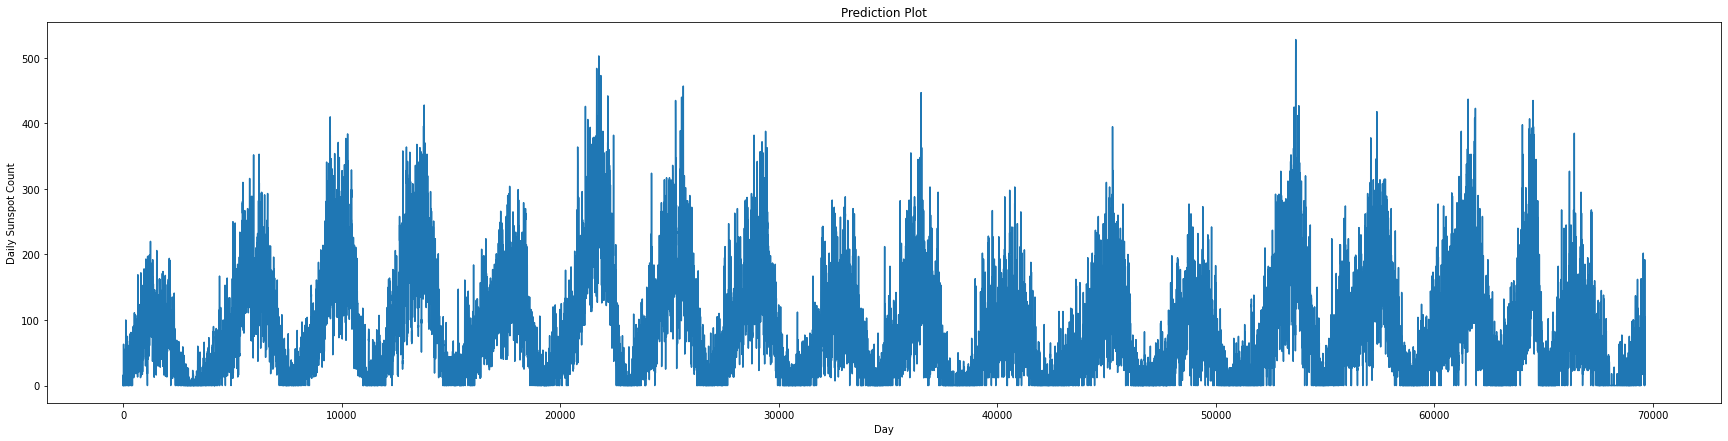

In [290]:
plt.figure(figsize=(30,7))
plt.title("Prediction Plot")
plt.xlabel("Day")
plt.ylabel("Daily Sunspot Count")
plt.plot(Predict_Daily.index, Predict_Daily.Observed)

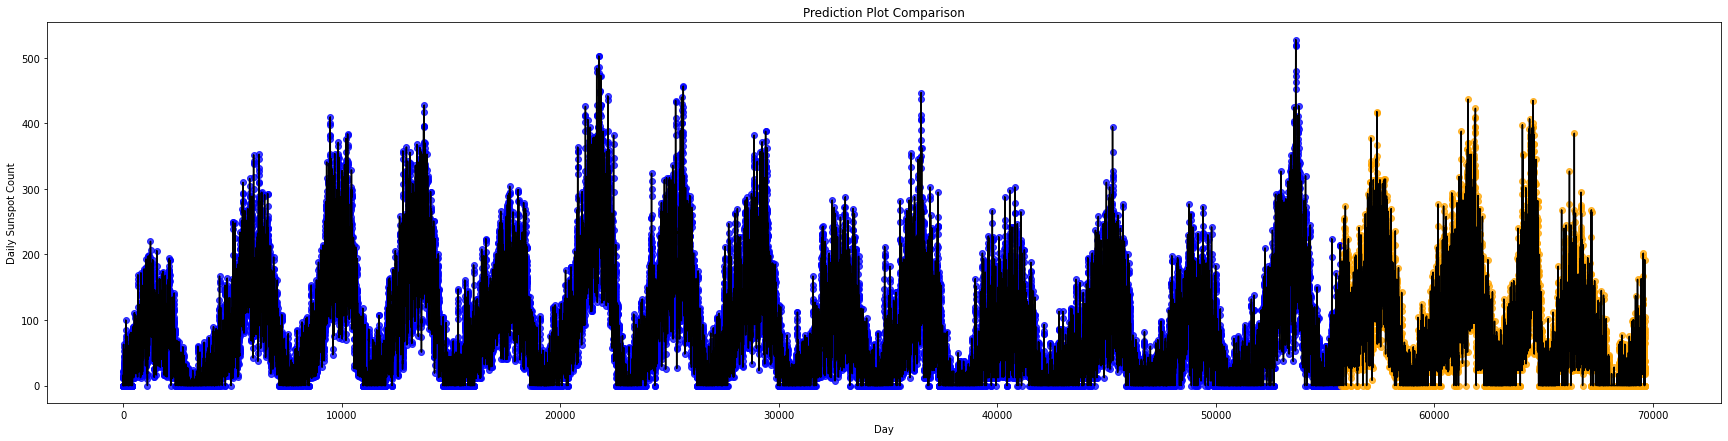

In [291]:
plt.figure(figsize=(30,7))
plt.title("Prediction Plot Comparison")
plt.xlabel("Day")
plt.ylabel("Daily Sunspot Count")
plt.plot(Predict_Daily.index, Predict_Daily.Observed, c = 'black')
plt.scatter(Predict_Daily.index, Predict_Daily.Train_Prediction, 
            marker = 'o', c = 'blue', alpha = 0.75)
plt.scatter(Predict_Daily.index, Predict_Daily.Test_Prediction, 
            marker = 'o', c = 'orange', alpha = 0.75)
plt.show()

# MONTHLY

In [292]:
sunspots2 = pd.read_csv('SIDC-SUNSPOTS_13.csv')
sunspots2['13-Month Smoothed Total Sunspot Number'] = sunspots2['13-Month Smoothed Total Sunspot Number'].fillna(0)
sunspots2['Date'] = pd.to_datetime(sunspots2['Date'])
sunspots2

,Date,13-Month Smoothed Total Sunspot Number,Monthly Mean Standard Deviation,Number of Observations,Definitive/Provisional Indicator
0,2017-07-31,0.0,NaN,958.0,0.0
1,2017-06-30,0.0,NaN,947.0,0.0
2,2017-05-31,0.0,NaN,1020.0,0.0
3,2017-04-30,0.0,NaN,831.0,0.0
4,2017-03-31,0.0,NaN,1011.0,0.0
...,...,...,...,...,...
3218,1749-05-31,0.0,NaN,NaN,1.0
3219,1749-04-30,0.0,NaN,NaN,1.0
3220,1749-03-31,0.0,NaN,NaN,1.0
3221,1749-02-28,0.0,NaN,NaN,1.0


In [293]:
monthly = sunspots2.loc[(sunspots2['Date'] >= '1749') & (sunspots2['Date'] <= '2018')]
monthly = monthly[monthly.columns[~monthly.columns.isin(['Number of Observations','Definitive/Provisional Indicator','Monthly Mean Standard Deviation'])]]
monthly

,Date,13-Month Smoothed Total Sunspot Number
0,2017-07-31,0.0
1,2017-06-30,0.0
2,2017-05-31,0.0
3,2017-04-30,0.0
4,2017-03-31,0.0
...,...,...
3218,1749-05-31,0.0
3219,1749-04-30,0.0
3220,1749-03-31,0.0
3221,1749-02-28,0.0


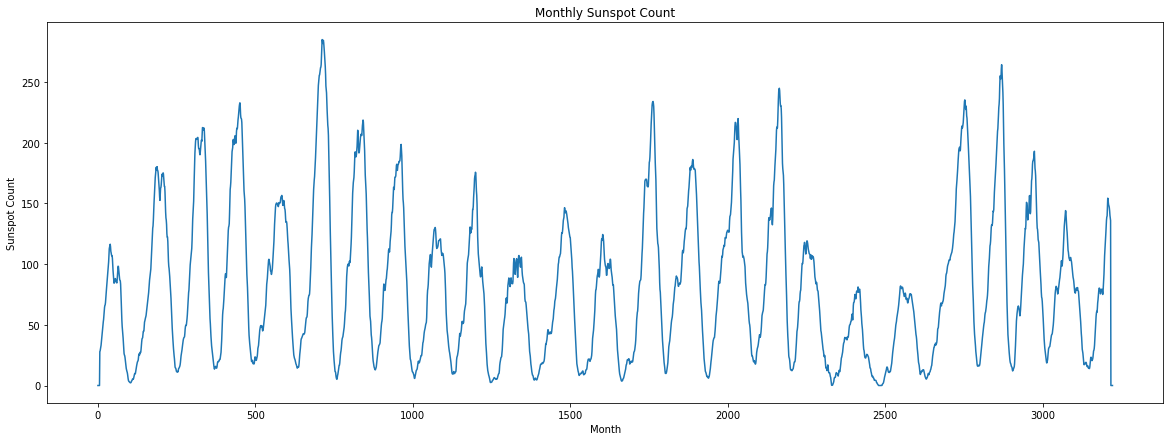

In [294]:
Y = monthly['13-Month Smoothed Total Sunspot Number']
X = [x for x in range(0, len(Y))]

fig, ax = plt.subplots(1,1, figsize=(20,7))
plt.title("Monthly Sunspot Count")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(X, Y)

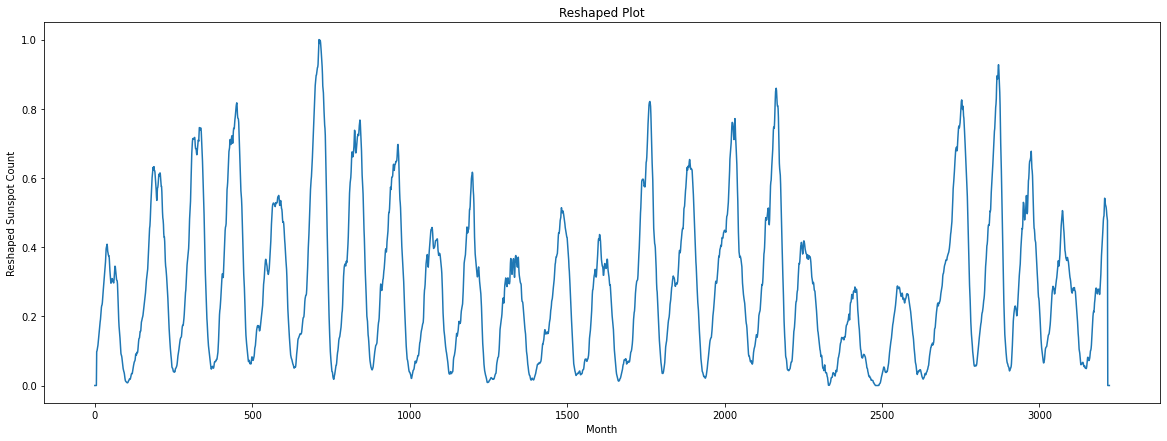

In [295]:
np.random.seed()
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y.values.reshape(-1,1))
fig, ax = plt.subplots(1,1, figsize=(20,7))
plt.title("Reshaped Plot")
plt.xlabel("Month")
plt.ylabel("Reshaped Sunspot Count")
plt.plot(X, Y1)

In [296]:
count = int(monthly.shape[0]*0.8)
Train = monthly[:count]
Test = monthly[count:]

y_hat_avg = Test.copy()
fit1 = Holt(np.asarray(Train['13-Month Smoothed Total Sunspot Number'])).fit()

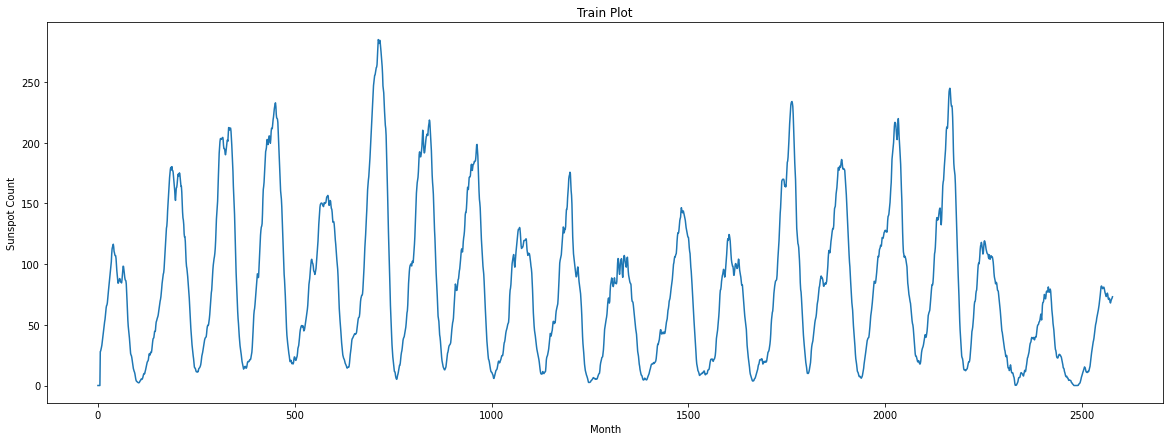

In [297]:
plt.figure(figsize=(20,7))
plt.title("Train Plot")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(Train.index, Train['13-Month Smoothed Total Sunspot Number'])

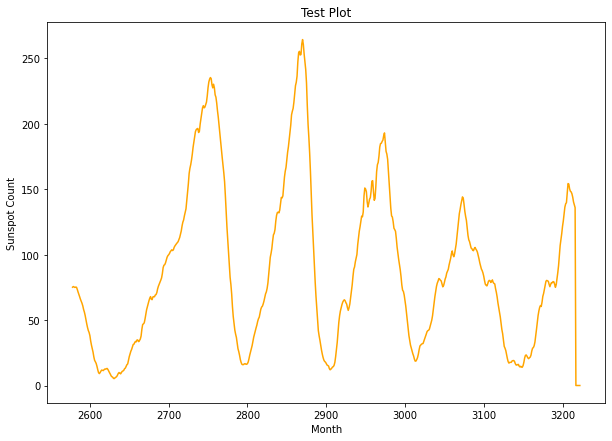

In [298]:
plt.figure(figsize=(10,7))
plt.title("Test Plot")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(Test.index,Test['13-Month Smoothed Total Sunspot Number'], color='orange')

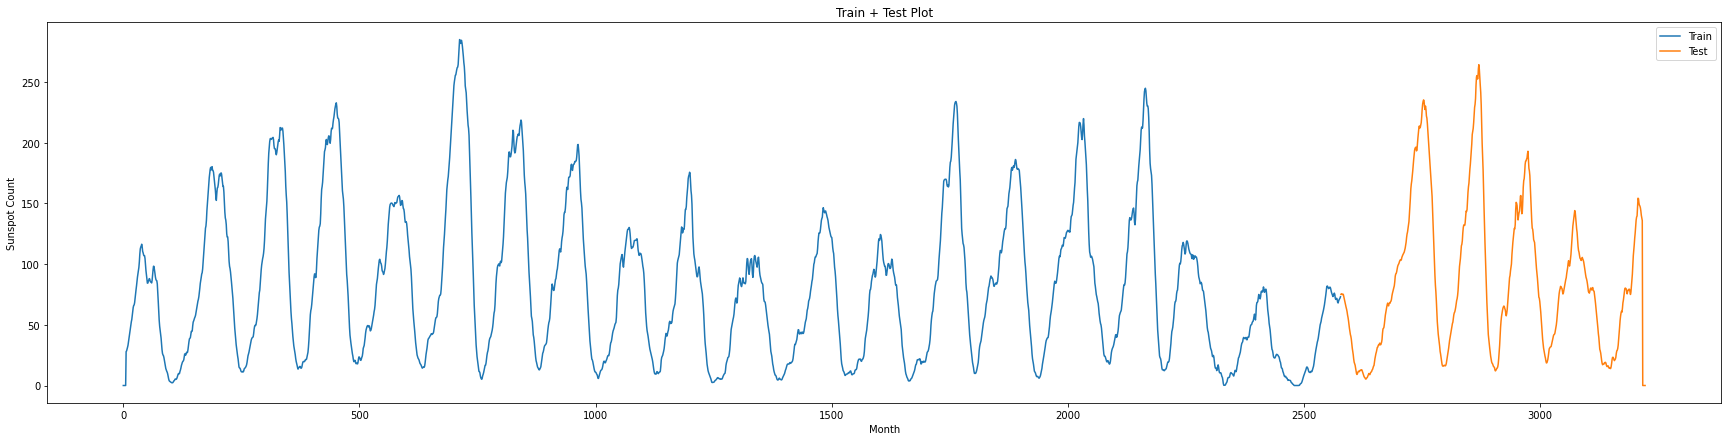

In [299]:
plt.figure(figsize=(30,7))
plt.title("Train + Test Plot")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(Train.index, Train['13-Month Smoothed Total Sunspot Number'], label='Train')
plt.plot(Test.index,Test['13-Month Smoothed Total Sunspot Number'], label='Test')
plt.legend(loc='best')

In [300]:
Predict_Monthly = pd.DataFrame(data = {'Time_step':X, 'Observed': Y, 
                                             'Train_Prediction': Train['13-Month Smoothed Total Sunspot Number'], 
                                             'Test_Prediction':Test['13-Month Smoothed Total Sunspot Number']},
                                    index = Y.index,)
Predict_Monthly

,Time_step,Observed,Train_Prediction,Test_Prediction
0,0,0.0,0.0,NaN
1,1,0.0,0.0,NaN
2,2,0.0,0.0,NaN
3,3,0.0,0.0,NaN
4,4,0.0,0.0,NaN
...,...,...,...,...
3218,3218,0.0,NaN,0.0
3219,3219,0.0,NaN,0.0
3220,3220,0.0,NaN,0.0
3221,3221,0.0,NaN,0.0


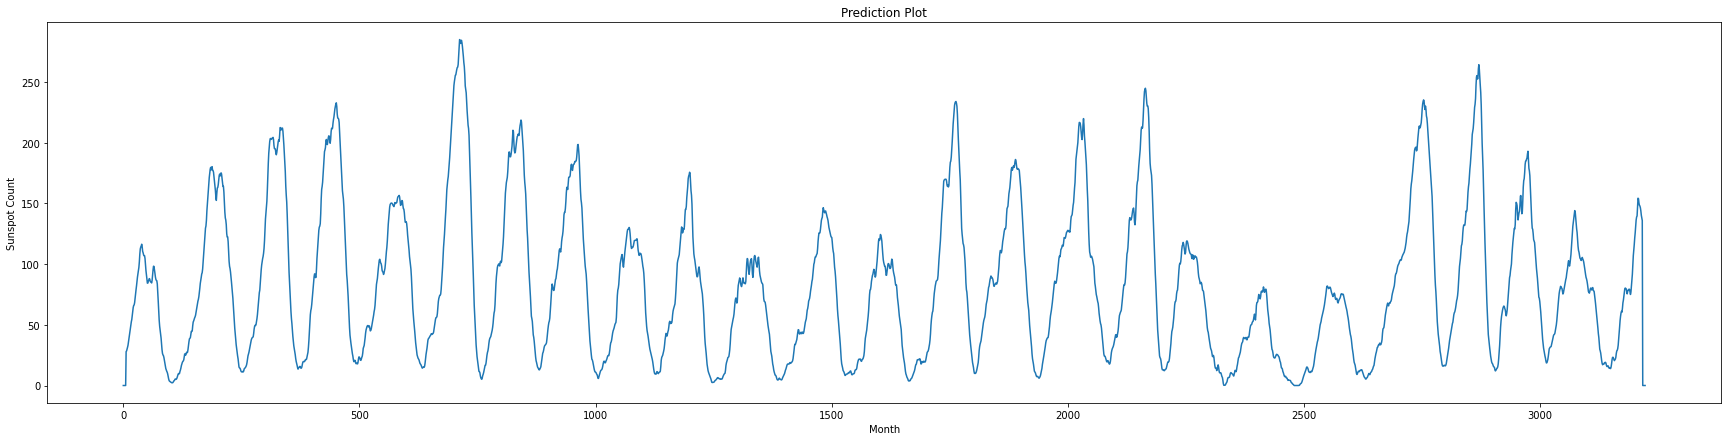

In [301]:
plt.figure(figsize=(30,7))
plt.title("Prediction Plot")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(Predict_Monthly.index, Predict_Monthly.Observed)

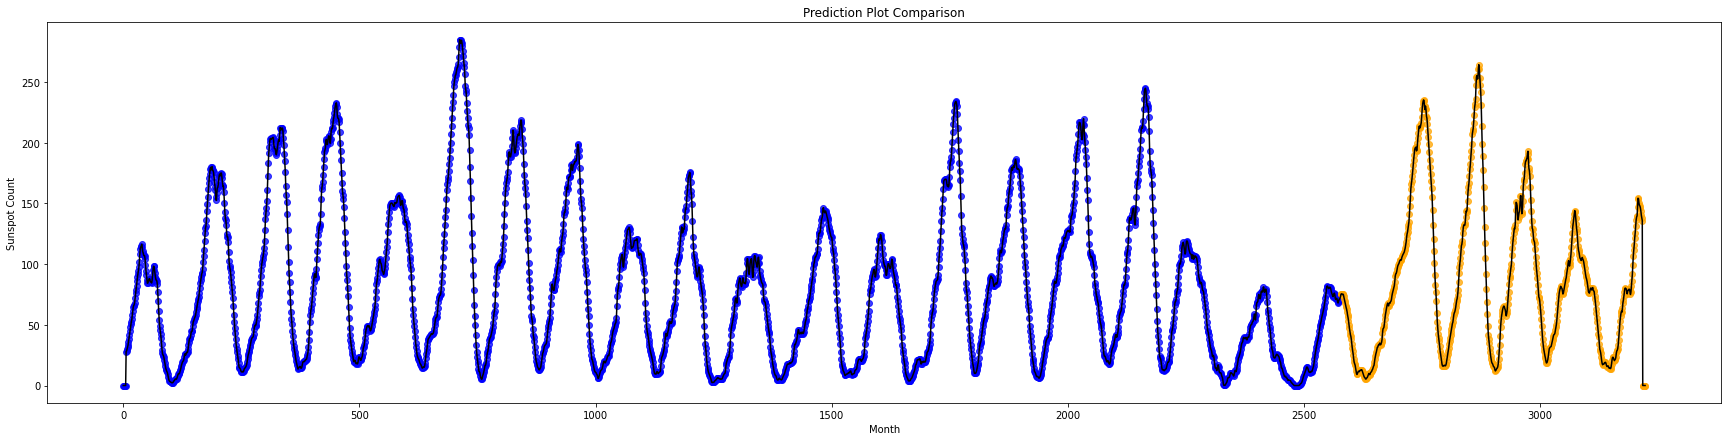

In [302]:
plt.figure(figsize=(30,7))
plt.title("Prediction Plot Comparison")
plt.xlabel("Month")
plt.ylabel("Sunspot Count")
plt.plot(Predict_Monthly.index, Predict_Monthly.Observed, c = 'black')
plt.scatter(Predict_Monthly.index, Predict_Monthly.Train_Prediction, 
            marker = 'o', c = 'blue', alpha = 0.75)
plt.scatter(Predict_Monthly.index, Predict_Monthly.Test_Prediction, 
            marker = 'o', c = 'orange', alpha = 0.75)
plt.show()